# Import libaries and load data

In [1]:
from libraries import *
from sklearn.utils import resample

In [2]:
# load data set
df = pd.read_csv('heart_failure_clinical_records_dataset-pcp.csv')

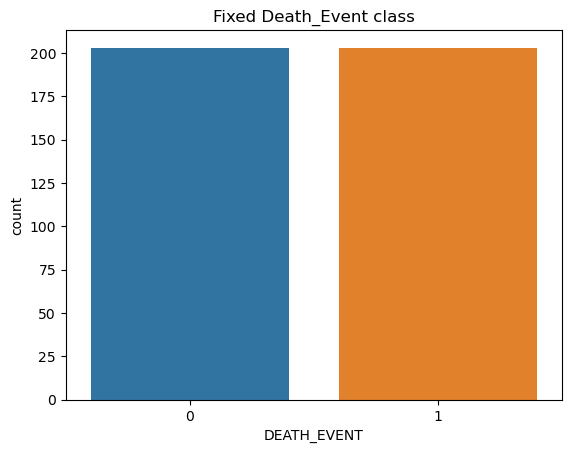

In [3]:
survived = df[df['DEATH_EVENT']==0]
died = df[df['DEATH_EVENT']==1]
# Upsample minority
died_upsampled = resample(died,
                          replace=True, 
                          n_samples=len(survived), # match number in minority class
                          random_state=27) # reproducible results

# Combine upsampled minority class with majority class
upsampled = pd.concat([died_upsampled, survived])

sns.countplot(x='DEATH_EVENT', data=upsampled).set(title='Fixed Death_Event class')
plt.show()

# Check new class counts
#upsampled['DEATH_EVENT'].value_counts()

In [4]:
# labels
y = upsampled['DEATH_EVENT']

# features
X = upsampled.drop('DEATH_EVENT', axis=1)

# Logistic Regression

In [5]:
# Split the dataset into training and testing sets with 80% for training and 20% for testing,
# ensuring reproducibility by setting the random state to 50.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [6]:
# Create a Logistic Regression model instance.
lr = LogisticRegression()

# Train the Logistic Regression model on the training data.
lr.fit(X_train, y_train)

LogisticRegression()

In [7]:
# intercept
intercept_class_1 = lr.intercept_[0]


In [8]:
coeff_df = pd.DataFrame(lr.coef_.T, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,0.029604
anaemia,0.000110
creatinine_phosphokinase,0.000128
diabetes,0.000608
ejection_fraction,-0.061672
high_blood_pressure,0.000135
platelets,-0.000002
serum_creatinine,0.006283
serum_sodium,0.021054
gender,-0.000320


In [9]:
pred_lr = lr.predict(X_test)
confusion_matrix(y_test, pred_lr)

array([[28,  7],
       [10, 37]], dtype=int64)

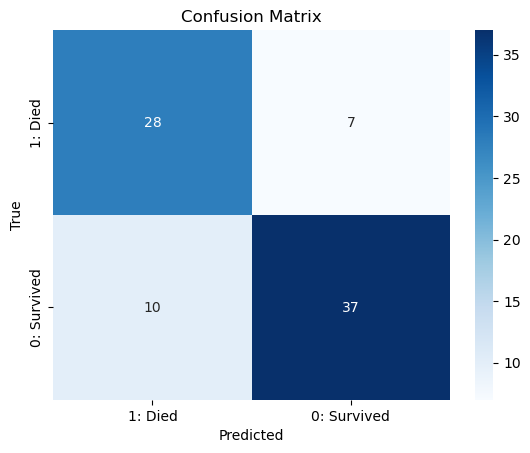

In [10]:
labels = ['1: Died', '0: Survived']

log_conf_mat = pd.DataFrame(data=confusion_matrix(y_test, pred_lr), index=labels, columns=labels)
# Display the confusion matrix using a heatmap
sns.heatmap(log_conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

A couple of key points regarding the confusion matrix:

Each row corresponds to the overall counts of "Died" and "Survived" in the ground truth. In simpler terms, the sum of all values in the first row represents the total number of observations in our test dataset labeled as "Died."

Correspondingly, each column reflects the counts for predictions categorized as "Died" and "Survived."

The intersection of each row and column provides distinct insights into the results, revealing True Positives (TP), True Negatives (TN), False Positives (FP), or False Negatives (FN).

Drawing conclusions from the presented confusion matrix, the model identified a total of 35 observations as "Died" (28 true positives + 7 false positives) and 47 observations as "Survived" (10 false negatives + 37 true negatives).

In [11]:
print('Classification Report')
print(classification_report(y_test, pred_lr, target_names=['1: Died', '0: Survived']))

Classification Report
              precision    recall  f1-score   support

     1: Died       0.74      0.80      0.77        35
 0: Survived       0.84      0.79      0.81        47

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.80      0.79      0.79        82



# Decision Tree Classifier

In [12]:
def train_decision_tree(X_train, y_train, random_state=42):
    # Create a Decision Tree classifier instance
    tree = DecisionTreeClassifier(random_state=random_state)

    # Train the Decision Tree classifier on the training data
    tree.fit(X_train, y_train)

    return tree

In [13]:
trained_tree = train_decision_tree(X_train, y_train)

In [14]:
# Use the trained Decision Tree classifier to make predictions on the test set
y_pred = trained_tree.predict(X_test)

# Display the counts of each class in the true labels (y_test)
class_counts = y_test.value_counts()
print("Class counts in y_test:")
print(class_counts)


Class counts in y_test:
1    47
0    35
Name: DEATH_EVENT, dtype: int64


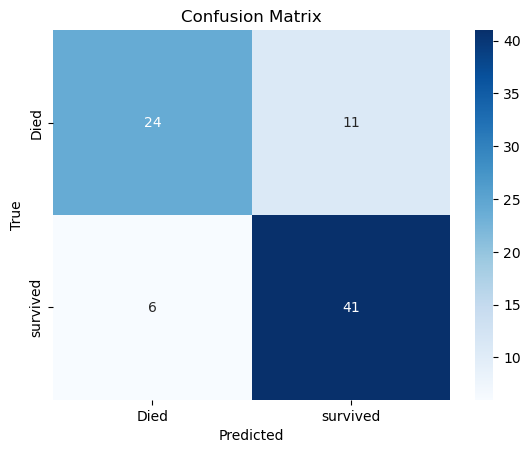

In [15]:
labels = ['Died', 'survived']

tree_conf_mat = pd.DataFrame(data=confusion_matrix(y_test, y_pred), index=labels, columns=labels)
# Display the confusion matrix using a heatmap
sns.heatmap(tree_conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
print(classification_report(y_test, y_pred, target_names=['Died', 'survived']))

              precision    recall  f1-score   support

        Died       0.80      0.69      0.74        35
    survived       0.79      0.87      0.83        47

    accuracy                           0.79        82
   macro avg       0.79      0.78      0.78        82
weighted avg       0.79      0.79      0.79        82



# Support Vector Machine

In [17]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)



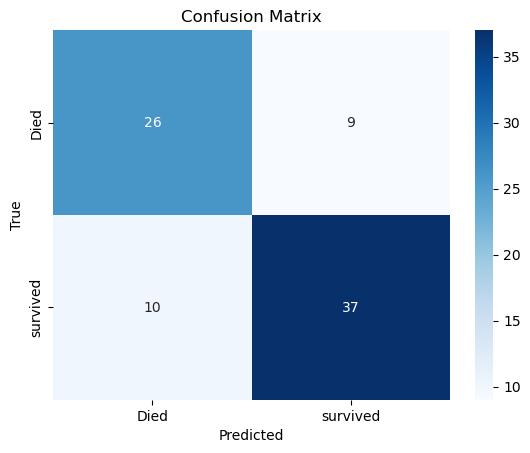

In [18]:
labels = ['Died', 'survived']

SVM_conf_mat = pd.DataFrame(data=confusion_matrix(y_test, y_pred), index=labels, columns=labels)
# Display the confusion matrix using a heatmap
sns.heatmap(SVM_conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.7682926829268293


Classification Report:

               precision    recall  f1-score   support

           0       0.72      0.74      0.73        35
           1       0.80      0.79      0.80        47

    accuracy                           0.77        82
   macro avg       0.76      0.77      0.76        82
weighted avg       0.77      0.77      0.77        82



# Save the model

In [20]:
# Save the trained model to a file using pickle
with open('death_model.pkl', 'wb') as file:
    pickle.dump(lr, file)